# Aprendendo Sintaxe do Pytorch

In [1]:
import torch

tns = torch.randn(9, 12)
tns1 = tns[0:5, 0:4]
tns2 = tns[5:, 4:]

resultado = torch.mm(tns1, tns2)
print(resultado.size())
     


torch.Size([5, 8])


Assim como o NumPy, o Pytorch é uma biblioteca de processamento vetorial/matricial/tensorial. Operações sobre os tensores do Pytorch possuem sintaxe consideravelmente parecida com operações sobre tensores do NumPy.

Para mais informações sobre tensores em PyTorch, consulte a documentação:
https://pytorch.org/docs/stable/tensors.html

## Tipos de tensores

Você pode criar tensores do PyTorch de inúmeras formas! Vamos ver primeiro os tipos de tensores que estão ao nosso dispor. Para isso, vamos converter listas comuns do Python em tensors do PyTorch.

Note que a impressão de tensores dos tipos float32 e int64 não vêm acompanhadas do parâmetro de tipo dtype, visto que se tratam dos tipos padrão trabalhados pelo PyTorch.

In [2]:
import torch
lista = [ [1,2,3],
          [4,5,6] ]

tns = torch.Tensor(lista)
print(tns.dtype)
print(tns)

print('')

tns = torch.DoubleTensor(lista)
print(tns.dtype)
print(tns)

print('')
tns = torch.LongTensor(lista)
print(tns.dtype)
print(tns)

     

torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])

torch.float64
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


## Outras formas de instanciar tensores

A partir de arrays Numpy <br>
*torch.from_numpy(arr)*

In [3]:
import numpy as np

arr = np.random.rand(3,4)
arr = arr.astype(int)
print(arr)
print(arr.dtype)

print('')
tns = torch.from_numpy(arr)
print(tns)
print(tns.dtype)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
int32

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)
torch.int32


## Tensores inicializados

Essas funções recebem como parâmetro o tamanho de cada dimensão do tensor. Aqui vamos conhecer as seguintes funções:

torch.ones() -> Cria um tensor preenchido com zeros.

torch.zeros() -> Cria um tensor preenchido com uns.

torch.randn()-> Cria um tensor preenchido com números aleatórios a partir de uma distribuição normal.

In [4]:
tns1 = torch.ones(2, 3)
tns0 = torch.zeros(3, 5)
tnsr = torch.randn(3, 3)

print(tns1)
print(tns0)
print(tnsr)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-0.8716, -0.6276,  0.0719],
        [-0.9225, -0.1165, -0.9281],
        [-1.0212, -0.0409,  0.3517]])


## Transformar um tensor para um array em numpy

In [5]:
arr = tnsr.data.numpy()
print(arr)     

[[-0.8716218  -0.6276122   0.07189906]
 [-0.92245936 -0.11654707 -0.92810756]
 [-1.0212265  -0.04092501  0.35165378]]


## Indexação

De posse dessa informação, a indexação é feita de forma similar a arrays Numpy, através da sintaxe de colchetes [].

In [6]:
# tnsr[0,1]
print(tnsr[0:2, 2].data.numpy())
print(tnsr[0, 1].item())

[ 0.07189906 -0.92810756]
-0.6276121735572815


## Operações com tensores

A função .item() utilizada anteriormente extrai o número de um tensor que possui um único valor, permitindo realizar as operações numéricas do Python. Caso o item não seja extraído, operações que envolvam tensores vão retornar novos tensores.

Vale ressaltar também que operações entre tensores são realizadas ponto a ponto, operando cada elemento (i, j) do tensor t1, com o elemento (i, j) do tensor t2.


In [7]:
tns1 = torch.randn(2,2,3)
tns2 = torch.ones(2,2,3)

print(tns1)
print(tns2)

print('')

print(tns1*tns2)
     


tensor([[[ 0.2079,  0.4077,  0.0889],
         [ 0.8412,  0.6347,  0.6848]],

        [[-0.0747,  0.5451,  0.4365],
         [ 0.7928,  0.3592, -0.3479]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

tensor([[[ 0.2079,  0.4077,  0.0889],
         [ 0.8412,  0.6347,  0.6848]],

        [[-0.0747,  0.5451,  0.4365],
         [ 0.7928,  0.3592, -0.3479]]])


## Função .size() e .view()

Uma operações importantíssima na manipulação de tensores para Deep Learning é a reorganização das suas dimensões. Dessa forma podemos, por exemplo, linearizar um tensor n-dimensional.

In [8]:
print(tns2.size())

print(tns2.view(tns2.size(0), -1))

torch.Size([2, 2, 3])
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


## GPU Cast

Para que o seu script dê suporte a infraestruturas com e sem GPU, é importante definir o dispositivo no início do seu código de acordo com a verificação apresentada a seguir. Essa definição de dispositivo será utilizada toda vez que precisarmos subir valores na GPU, como os pesos da rede, os gradientes, etc.


In [9]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
  
print(device)
tns2 = tns2.to(device)
print(tns2)
     


cpu
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])


# Camada Linear

Vamos começar importando o módulo nn e o torch

In [10]:
import torch
from torch import nn # neural networks   

Agora vamos instanciar nossa camada linear, com uma entrada de dimensionalidade d = 3 e a saída de tamanho 1, já que estamos instanciando um perceptron simples.

Qualquer dúvida, a documentação está logo ali ;)
https://pytorch.org/docs/stable/nn.html#torch.nn.Linear


In [11]:
torch.manual_seed(42)

perceptron = nn.Linear(3, 1)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


Segue então o mesmo modelo classico do perceptron ![](https://camo.githubusercontent.com/00dc8876a8ccd7915e8d256d462bcd9a6011c72b0d44483f4cc6d5ee1252c95c/68747470733a2f2f64726976652e676f6f676c652e636f6d2f75633f6578706f72743d766965772669643d314164316e4b554738756a565779734f61754b597a4f68686d5232365a6c367943)
<br>
Os pesos W e o viés b são inicializados aleatoriamente pelo pytorch. Podemos consultar essa informação de duas formas:

- iterando em seus named_parameters
- acessando cada parâmetro individualmente através do seu nome padrão.


In [12]:
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)
  
print('')
print(perceptron.weight.data)
print(perceptron.bias.data)
     

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [13]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

# w1 * x1 + w2 * x2 + w3 * x3 + b = 0
     

É importante não se esquecer que no perceptron esses valores definem um hiperplano no espaço. Como 3 dimensões está no limite da nossa capacidade de visualização, vamos aproveitar esse momento para visualizar o plano aleatoriamente inicializado pelo torch.

Para isso, usaremos aqui a biblioteca de visualização matplotlib, com o toolkit de plot 3D.
Mais informações em: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#mpl_toolkits.mplot3d.Axes3D.plot_surface

Para se inspirar: https://stackoverflow.com/questions/48335279/given-general-3d-plane-equation-how-can-i-plot-this-in-python-matplotlib


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()

    X1 = np.linspace(-1, 1, 10)
    X2 = np.linspace(-1, 1, 10)

    X1, X2 = np.meshgrid(X1, X2)
    X3 = (b - w1 * X1 - w2 * X2) / w3

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')  # Use add_subplot for older versions
    ax.view_init(azim=180)

    ax.plot_surface(X1, X2, X3, cmap='plasma', alpha=0.5)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')

    plt.title('Perceptron Decision Boundary in 3D')
    plt.show()
  
     


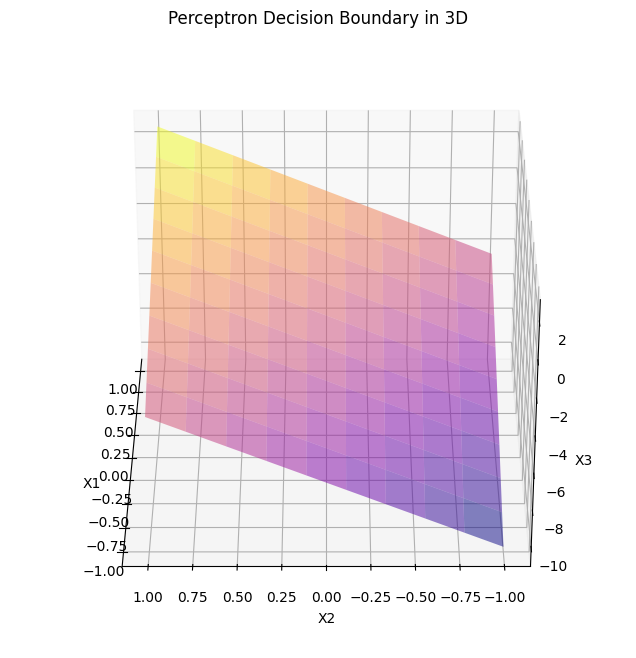

In [15]:
plot3d(perceptron)

# Forward

O fluxo da informação de entrada através da rede recebe o nome de forward, já que a informação é passada para a frente. Vamos então realizar o forward da nossa rede de um homem pereptron só. Para isso, basta realizar uma chamada de função com a variável onde instaciamos a camada Linear.



## Fizemos anteriormente a instância da camada
linear = nn.Linear(in_features=3, out_features=1)

## Para realizar o forward
y = linear(X)


tensor([0.7391], grad_fn=<AddBackward0>)


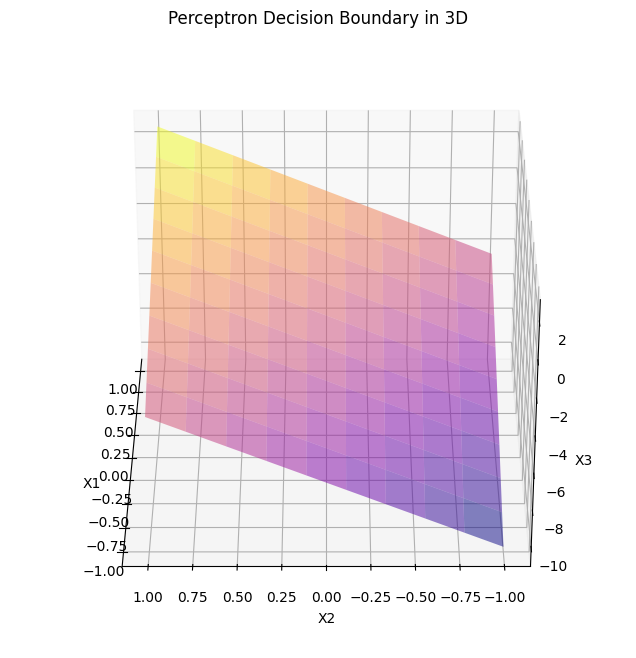

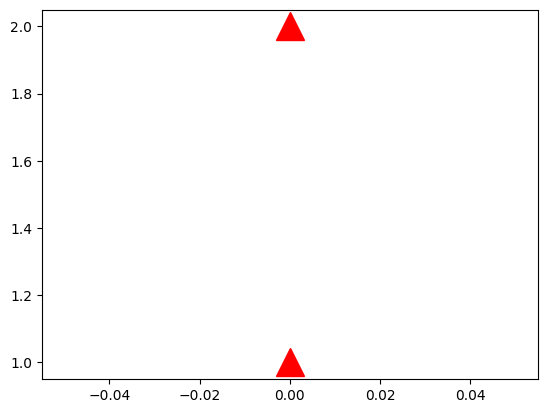

In [16]:
X = torch.Tensor([0, 1, 2])
y = perceptron(X)

print(y)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)
     

# Classificação Linear

A equação da reta é aprendida na forma $ax + by + c$, mas para nos adequarmos às nomenclaturas de redes neurais, podemos reescrever essa equação como ${w_1x_1 + w_2x_2 + b}$. Ou seja, ${w_1}$, ${w_2}$ e ${b}$ são os parâmetros que definem o nosso **modelo linear**, a nossa reta.<br>Vamos começar realizando o plot de uma reta específica:,${-1x_1 + 4x_2 + 0.4}$

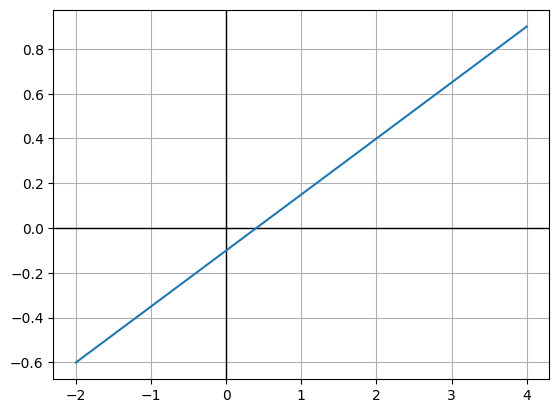

In [17]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

# ax + by + c = 0
# y = (-a*x -c)/b
def plotline(a, b, c):
  x = np.linspace(-2, 4, 50)
  y = (-a*x -c)/b

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)
  
plotline(a, b, c)
     


## Solucionando a equação da reta para diferentes pontos

A seguir vamos selecionar três pontos no espaço, e soucionar a equação da reta para esses pontos.


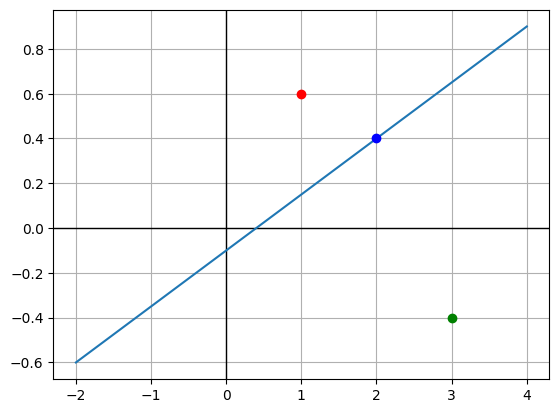

In [18]:
p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotline(a,b,c)
plt.plot(p1[0], p1[1], color='b', marker='o')
plt.plot(p2[0], p2[1], color='r', marker='o')
plt.plot(p3[0], p3[1], color='g', marker='o')

In [19]:
ret1 = a*p1[0] + b*p1[1] + c
print("%.2f" % ret1)

ret2 = a*p2[0] + b*p2[1] + c
print("%.2f" % ret2)

ret3 = a*p3[0] + b*p3[1] + c
print("%.2f" % ret3)
     

0.00
1.80
-4.20


Note que o ponto <font color='blue'>$p_1$</font> está na reta, enquanto <font color='red'>$p_2$</font> está acima da reta e <font color='green'>$p_3$</font> abaixo. Ao solucionar a equação da reta para esses três pontos, tivemos respectivamente resultados <font color='blue'>nulo $(=0)$</font>, <font color='red'>positivo $(>0)$</font> e <font color='green'>negativo $(<0)$</font>.

Esse comportamento é consistente para quaisquer pontos na reta, acima ou abaixo dela. Ou seja, se chamarmos a equação da reta de $f(x)$, temos as seguintes regras:

* <font color='blue'>$f(x) = 0$</font> define pontos na reta
* <font color='red'>$f(x) > 0$</font> define pontos acima da reta
* <font color='green'>$f(x) < 0$</font> define pontos abaixo da reta


# Modelo Linear

Nossa reta pode ser interpretada como um modelo linear, que nada mais é do que uma **função de mapeamento** $X \rightarrow Y$, que mapeia cada ponto em $X$ para um ponto em $Y$. Em outras palavras, dados os parâmetros $W = \{w_1, w_2\}$ e $b$ de uma reta, é possível mapear uma entrada $X = \{x_1, x_2\}$ para a saída $f(x; W, b)$.

Para problemas de classificação, os valores de $y$ para novas entradas $x$ vão definir se $x$ é um ponto <font color='red'>acima</font> ou <font color='green'>abaixo</font> da reta, formando portanto um classificador capaz de **separar linearmente problemas com duas classes**.

<img src="https://drive.google.com/uc?export=view&id=18Emd5S0LxY_-6_oqOW_1oBztomJGuRfF" width="500">


## Regra Geral

Formalizando a nomenclatura de redes neurais, em duas dimensões $(x_1, x_2)$ nosso modelo linear tem dois **pesos** $(w_1, w_2)$ e um **viés** $b$, que em inglês são chamados de **w**eight e **b**ias. 

Em duas dimensões nosso modelo forma uma reta, como vimos anteriormente. Para um número de dimensões $d > 2$, modelos lineares são chamados de **hiperplanos**, e são compostos por:
* um peso $w_i$ para cada dimensão $x_i$. 
* um único viés $b$

Exemplo, para 3 dimensões $(x_1, x_2, x_3)$ teríamos três pesos $(w_1, w_2, w_3)$ e um único viés $b$. Sua função de mapeamento seria $y = w_1x_1 + w_2x_2 + w_3x_3 + b$
 
De forma geral, define-se que dada uma entrada com $d$ dimensões, a função de mapeamento de um modelo linear é $$y = \sum^{d}_{i=1}w_ix_i + b$$



## Exercício Sugerido

**Vamos treinar um classificador linear em duas dimensões usando a tecnologia mais avançada que existe: o seu cérebro!**

A célula a seguir produz uma distribuição aleatória para um problema de classificação com duas classes, usando a função ```make_classification()``` do sklearn. <br>
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

0


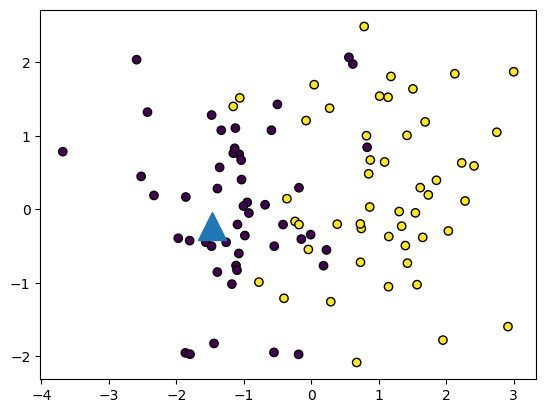

In [20]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

**Seu trabalho é** encontrar os melhores parâmetros $(W, b)$ de um modelo linear para classificar a distribuição gerada. 

O ideal é **não** fazer por tentativa e erro, mas prestar atenção no impacto de cada mudança realizada. Note que os pesos $W$ são componentes angulares do seu modelo, enquanto o viés $b$ é o componente linear que desloca a reta no espaço.


-4.4


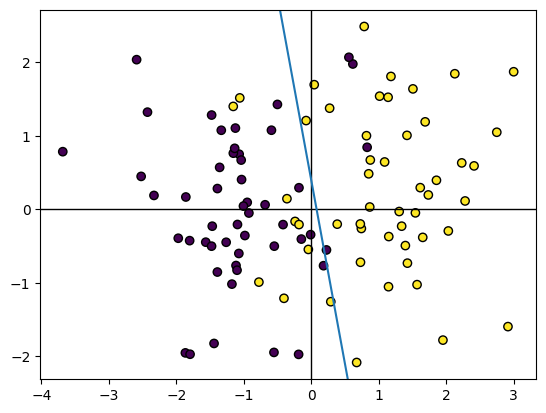

In [21]:
def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
w1 = 5 #a
w2 = 1  #b
b  = -0.4  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

Agora podemos utilizar o nosso modelo como um classificador linear com um simples **```if```** para avaliar a solução da equação da reta para novos pontos no espaço.

1 yellow


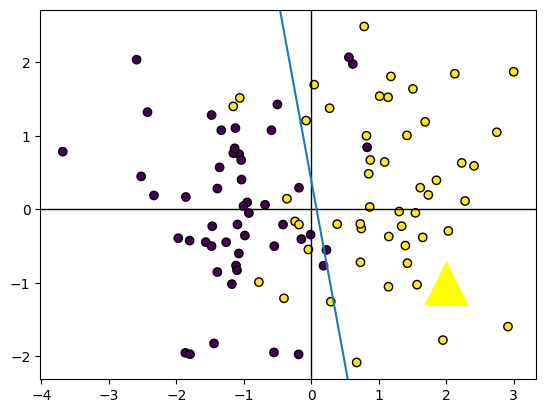

In [22]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b
  
  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'
  
p = (2, -1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

De posse da função ```classify()``` podemos agora classificar cada um dos pontos gerados aleatoriamente pelo ```make_classification```, calculando assim a acurácia do nosso modelo.

In [23]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1
    
    
print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 87.0


# Funções de Ativação

O módulo nn, que utilizamos para criar uma camada linear, também contém as principais funções de ativação. Então vamos primeiro importar o torch e o módulo nn

In [24]:
import torch
from torch import nn

Agora vamos retomar o exemplo do início desse capítulo, onde implementamos um modelo de classificação linear, definindo empiricamente os parâmetros adequados. Como já fizemos essa parte passo a passo, podemos copiar o código do nosso script:
Classificação-Linear.ipynb - https://colab.research.google.com/drive/14fL7OsRj4EGCnN2PjVUYFZievtGsq9ox


-2.8


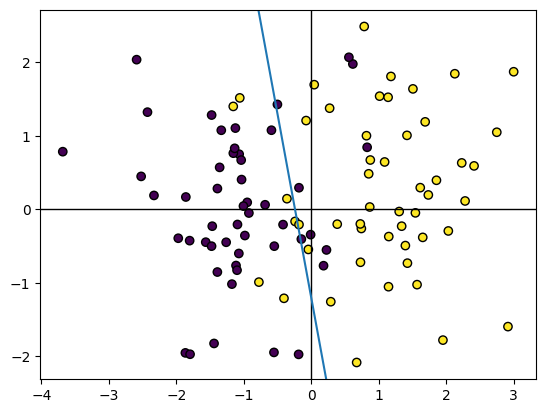

In [25]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

Agora vamos instanciar uma camada Linear análoga à nossa reta, ou seja:

- in_features = 2 : dimensionalidade da entrada
- out_features = 1 : dimensionalidade da saída

Vamos instanciar também uma ativação sigmóide para compor o nosso modelo de classificação. Documentação: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

Em seguida vamos substituir os pesos do perceptron com os parâmetros da nossa reta. Para isso criaremos um objeto Parameter, o tipo de dado que camadas do PyTorch aceitam para representar os seus parâmetros.
Documentação: https://pytorch.org/docs/stable/nn.html#torch.nn.Parameter


In [26]:
perceptron = nn.Linear(2, 1)
activation = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias   = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)
     


tensor([[-0.1549,  0.1427]])
tensor([-0.3443])
tensor([[5., 1.]])
tensor([1.2000])


Temos portanto:

- uma distribuição de pontos com duas classes linearmente separáveis
- um modelo linear de classificação binária, empiricamente definido, que inclui uma função de ativação sigmóide.

Agora vamos ver a diferença entre o resultado apresentado pelo perceptron antes e depois da função de ativação. Para isso, selecionei empiricamente alguns pontos da distribuiçã (índices 17, 21, 43 e 66) que nos ajudarão a entender o impacto da sigmóide.


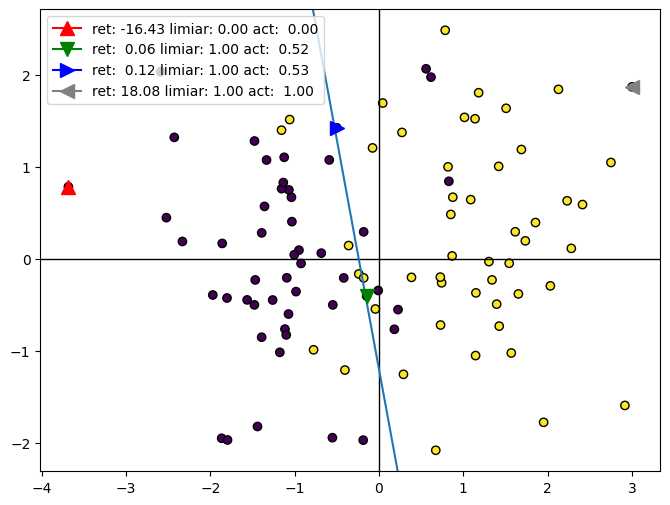

In [27]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])
  
  ret = perceptron(x)
  act = activation(ret)
  
  act_limiar = 0 if ret.data < 0 else 1
  
  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
  
plt.legend()
plt.show()

Com a sigmoid, elementos na fronteira de decisão recebem o valor 0.5, indicando baixa certeza sobre a classe desses elementos. Quanto mais afasta da zona de confusão, maior a certeza da classificação (seja para 0, ou para 1).

Podemos experimentar diferentes funções de ativação e ver como elas nos ajudam a interpretar a saída do perceptron.


In [28]:
# Descomente uma das linhas abaixo e rode novamente a célula anterior

activation = nn.ReLU()
# activation = nn.Tanh()
     


# Definindo uma Arquitetura no PyTorch


## Carregando dados

Exemplo de dados não-linearmente separáveis (distribuição em lua):
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html


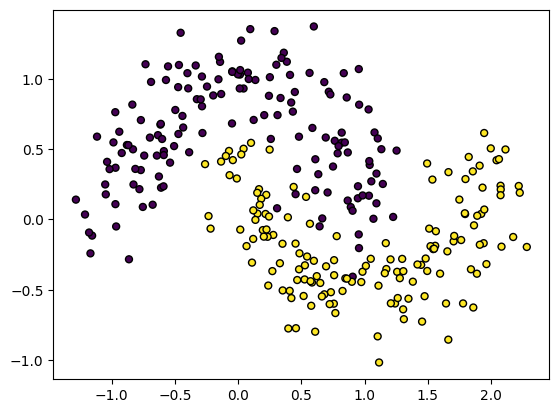

In [29]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', 
 c=Y1, s=25, edgecolor='k')
     


## nn.Sequential

O módulo nn.Sequential é um container onde se pode colocar múltiplos módulos. Ao realizar um forward em um objeto Sequential ele aplicará sequencialmente os módulos nele contidas para gerar uma saída.

Segue abaixo um exemplo desse módulo contendo 2 camadas Linear intercaladas por uma função de ativação ReLU.


In [30]:
import torch
from torch import nn # neural networks

input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # hidden (escondida)
                    nn.ReLU(),   # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output (saída)
print(net)
     


Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


Para mais informações, acesse: https://github.com/sksq96/pytorch-summary

In [31]:
from torchsummary import summary

summary(net, input_size=(1, input_size))
     


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0

## Forward

## Classe nn.Module

A forma mais organizada de definir modelos em PyTorch é implementando uma classe nos moldes da classe nn.Module. Para redes pequenas, como as que estamos aprendendo até o momento, sua importância pode não se destacar, mas modelos maiores e com funcionalidades mais complexas, são mais fáceis de implementar e realizar manutenções dessa forma.

Funções obrigatórias do nn.Module.

- __init()__: definição de hiperparâmetros e instância do modelo
- forward(): Fluxo da entrada para produzir uma saída



In [32]:
class MinhaRede(nn.Module):
  
  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()
    
    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)
    
  def forward(self, X):
    
    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)
    
    return output
     


Instanciando a rede

In [33]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size,hidden_size, output_size)  ## O método __init__()
print(net)
     


MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


## Forward

In [34]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())
     


(300, 2)
torch.Size([300, 1])


## Subindo informações na GPU

Para conseguir executar modelos maiores em tempo hábil, é preciso carregar as informação na GPU para que o processamento seja realizado por ela. Dentre as informações que conhecemos até o momento, duas delas precisam ser carregadas ba GPU:

- Entrada
- Rede

A célula a seguir contém a implementação sugerida para realizar esse processo.
Se certifique que o notebook está na configuração desejada (CPU/GPU). Para isso, basta acessar Edit -> Notebook Settings e definir o hardware desejado.

# Funções de Perda


## Classificação

In [92]:
import torch
from torch import nn     

O módulo nn e suas 1001 utilidades, também fornece as implementações das principais funções de perda. Então vamos primeiro importar o torch e o módulo nn



Vamos trabalhar com o dataset de classificação de vinhos.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html


In [93]:
from sklearn import datasets

wine = datasets.load_wine()
data = wine.data
target = wine.target

print(data.shape, target.shape)
print(wine.feature_names, wine.target_names)
     


(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] ['class_0' 'class_1' 'class_2']


Vamos instanciar um MLP com uma camada escondida e uma camada de saída. 

In [94]:

class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names)

net = WineClassifier(input_size, hidden_size, out_size).to(device) #cast na GPU 

In [95]:
print(net)

WineClassifier(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


Classificação

O primeiro passo é instanciar a função de perda de sua escolha. Trata-se de um problema de classificação com 3 classes, nesse caso a Cross Entropy é a função recomendada, que no PyTorch recebe o nome de CrossEntropyLoss: https://pytorch.org/docs/stable/nn.html#crossentropyloss

Assim como a rede, as entradas e os rótulos, a função de perda também deve ser carregada na GPU


In [96]:
criterion = nn.CrossEntropyLoss().to(device) # cast na GPU

Antes de aplicar a função de perda, vamos fazer o cast dos dados para tensores e extrair as predições y' da rede.

In [97]:
Xtns = torch.from_numpy(data).float() #dados 
Ytns = torch.from_numpy(target).long()  # Convert to LongTensor for target labels

# Cast na GPU
Xtns = Xtns.to(device)
Ytns = Ytns.to(device)

print(Xtns.dtype, Ytns.dtype)
     


torch.float32 torch.int64


In [98]:
pred = net(Xtns)

pred.shape

C:\Users\Anacleto\AppData\Local\Temp\ipykernel_8004\3449205414.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output  = self.softmax(self.out(feature))


torch.Size([178, 3])

Confira as dimensões de y e y'. Enquanto as predições estão em termos de probabilidades, os rótulos de classificação devem são valores inteiros referentes aos índices das classes

In [99]:
print(pred.shape, Ytns.shape)

print(pred[0].data, Ytns[0].data)

torch.Size([178, 3]) torch.Size([178])
tensor([6.2234e-18, 1.0000e+00, 0.0000e+00]) tensor(0)




As funções de perda implementadas no PyTorch esperam o seguinte padrão de chamada:

loss = criterion(prediction, target)

Vale lembrar que cada função de perda possui especificidades quanto às dimensões dos seus parâmetros. Para a Cross Entropy:

- prediction: (N, C)
- target: (N,)



In [100]:
loss = criterion(pred, Ytns)
print(loss)
     

tensor(1.1526, grad_fn=<NllLossBackward0>)


## Regressão

Vamos trabalhar com o dataset de Diabetes, cujo objetivo é prever a progressão da diabetes em um paciente.

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset



In [101]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

print(data.shape, target.shape)

print(data[14])
print(target[14])

(442, 10) (442,)
[ 4.53409833e-02 -4.46416365e-02 -2.56065715e-02 -1.25561242e-02
  1.76943802e-02 -6.12835791e-05  8.17748397e-02 -3.94933829e-02
 -3.19876395e-02 -7.56356220e-02]
118.0


Implementando o MLP

In [102]:
class DiabetesClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(DiabetesClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax(dim=-1)

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = 1  # Progressão da diabetes

net = DiabetesClassifier(input_size, hidden_size, out_size).to(device) #cast na GPU 

Para solucionar problemas de regressão, as funções de perda correspondentes esperam que ambos o rótulo e a predição tenham a mesma dimensionalidade. Não se trata mais de um problema categórico.

Portanto, vamos simular um problema de regressão e aplicar a MSELoss
Documentação: https://pytorch.org/docs/stable/nn.html#mseloss


In [103]:
criterion = nn.MSELoss().to(device)

# Cast na GPU
Xtns = torch.from_numpy(data).float().to(device)
Ytns = torch.from_numpy(target).float().to(device)

print(Xtns.shape, Ytns.shape)
     


torch.Size([442, 10]) torch.Size([442])


In [104]:
pred = net(Xtns)

loss = criterion(pred.squeeze(), Ytns)
print(loss.data)
     


tensor(28771.2148)


In [105]:
criterion = nn.L1Loss().to(device)

pred = net(Xtns)

loss = criterion(pred.squeeze(), Ytns)
print(loss.data)

tensor(151.1335)


 Documentação

Veja a documentação para consultar a lista de todas as funções de perda implementadas no PyTorch:
https://pytorch.org/docs/stable/nn.html#loss-functions


# Otimização

Para entender o processo de otimiza
ção, vamos utilizar um dataset de classificação de vinhos. A classificação é feita com base em análises químicas realizadas em três diferentes cultivos na mesma região da Itália.

O carregamento dos dados está descrito na documentação do Scikit-Learn:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

Dentre os 13 atributos do dataset, selecionamos 2 para facilitar a visualização dos resultados:

    Teor Alcoólico: índice 0
    Intensidade da cor: índice 9



## Primeiro devemos realizar a padronização dos dados

Um pré-processamento extremamente importante nesse caso é a padronização dos valores de entrada. Como as características variam em intervalos diferentes (cor: [1, 13], álcool: [11, 15]), elas vão exercer diferentes influências sobre o nosso modelo e prejudicar muito a sua convergência.


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Text(0, 0.5, 'color_intensity')

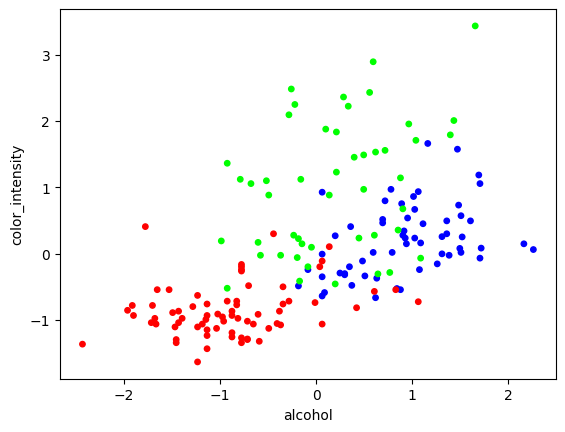

In [109]:
from sklearn import datasets
import matplotlib.pyplot as plt

features = [0, 9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

scaler = StandardScaler()
data = scaler.fit_transform(data)

print(wine.feature_names)

plt.scatter(data[:, 0], data[:,1], c=targets, s=15, cmap=plt.cm.brg)
plt.xlabel(wine.feature_names[features[0]])
plt.ylabel(wine.feature_names[features[1]])
     


## Instanciando sua rede

Antes de entrar nas nuances da otimização, vamos fazer o que já sabemos: instanciar um MLP de duas camadas neurais, uma escondida e outra de saída.

Lembre-se de definir o dispositivo de hardware (cuda ou cpu) antes de iniciar os trabalhos.


In [110]:
print(device) #imprime se e cpu ou gpu

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(wine.target_names) # numero de classes 

net = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, out_size),
    nn.Softmax()
)

net = net.to(device)

cpu


## Visualizando a fronteira de decisão

Para facilitar o entendimento do processo de otimização, vamos utilizar uma função auxiliar para visualizar a fronteira de decisão da nossa rede neural de classificação. Como acabamos de instanciá-la, seus pesos modelam uma função aleatória que não se ajusta adequadamente aos dados, e isso é facilmente visível em duas dimensões.

Adaptada de:
https://github.com/camilalaranjeira/Neural-Lectures/blob/master/XOR_Problem.ipynb


In [111]:
import numpy as np 

def plot_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
  y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
  
  spacing = min(x_max - x_min, y_max - y_min) / 100
  
  XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))
  
  data = np.hstack((XX.ravel().reshape(-1,1), 
                    YY.ravel().reshape(-1,1)))
  
  # For binary problems
  # db_prob = model(Variable(torch.Tensor(data)).cuda() )
  # clf = np.where(db_prob.cpu().data < 0.5,0,1)
  
  # For multi-class problems
  db_prob = model(torch.Tensor(data).to(device) )
  clf = np.argmax(db_prob.cpu().data.numpy(), axis=-1)
  
  Z = clf.reshape(XX.shape)
  
  plt.contourf(XX, YY, Z, cmap=plt.cm.brg, alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=25, cmap=plt.cm.brg)
     


C:\Users\Anacleto\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


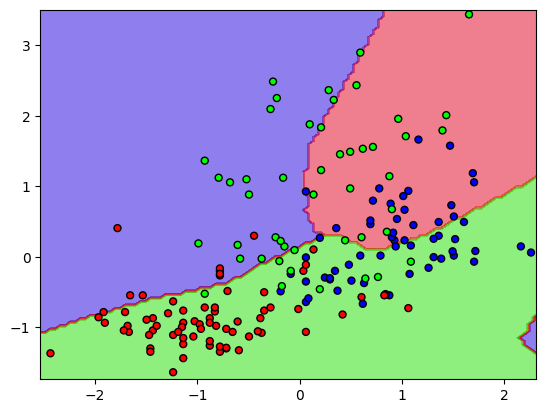

In [112]:
plot_boundary(data, targets, net)

## Pacote torch.optim

Mãos a obra! Vamos agora otimizar a nossa rede usando os algoritmos mais tradicionais da área. Para isso, a biblioteca torch.optim nos será bem útil, pois ela implementa os principais algoritmos de otimização de redes neurais.

O primeiro passo é instanciar o otimizador. De acordo com o pacote optim, basta chamar o otimizador escolhido, passando como parâmetro:

    Os parâmetros da rede que será otimizada (net.parameters())
    A taxa de aprendizado

A depender do otimizador, pode ser necessário alimentar outros parâmetros, mas esses dois são obrigatórios!

Vamos utilizar a Descida do Gradiente que vimos na aula teórica, implementada pelo otimizador optim.SGD (Stochastic Gradient Descent).


In [116]:
from torch import optim

# Função de Perda
criterion = nn.CrossEntropyLoss().to(device)

# Otimizador: Descida do Gradiente
# Stochastic Gradient Descent
optimizer = optim.SGD(net.parameters(), lr=1e-3)
     

## Hiperparâmetros

    Valores definidos antes do início do aprendizado
    Devem ser ajustados para cada tarefa específica

A taxa de aprendizado não é o primeiro hiperparâmetro que temos contato. Ao definir a arquitetura da sua rede (quantos neurônios e quantas camadas) você também teve que escolher um valor adequado. Essa escolha pode ser empírica, mas em geral deve ser experimental, na busca pelo melhor conjunto de hiperparâmetros para solucionar o seu problema!

    🐼 Empírica (Abordagem do Panda): O programador investe seus esforços em um único modelo (um bebê panda), e altera os hiperparâmetros com base na sua experiência e nas observações
    💻 Experimental: Múltiplos modelos são gerados simultaneamente, com diferentes combinações de hiperparâmetros. Dentre eles, é escolhido o que apresentar melhor performance.



## Cast do dados

Os dados carregados do Scikit-Learn são retornados como ndarrays, por isso precisamos convertê-los para tensores e carregá-los na GPU (caso disponível) antes de alimentar o modelo neural.


In [114]:
X = torch.FloatTensor(data).to(device) # GPU
Y = torch.LongTensor(targets).to(device)

## Treinando um modelo

O treinamento consiste nas etapas que vimos na aula teórica. Aqui vamos relacionar cada etapa ao seu código correspondente.

    Forward
        - Alimentar os dados para a rede
    pred = net(X)
        - Calcular a função de custo
    loss = criterion(pred, y)
    Backpropagation
        - Calcular o gradiente
    loss.backward()
        - Atualizar os pesos
    optimizer.step()

A princípio não vamos falar de procedimentos adequados de treinamento. Vamos apenas realizar as etapas de treinamento e ver o que acontece.


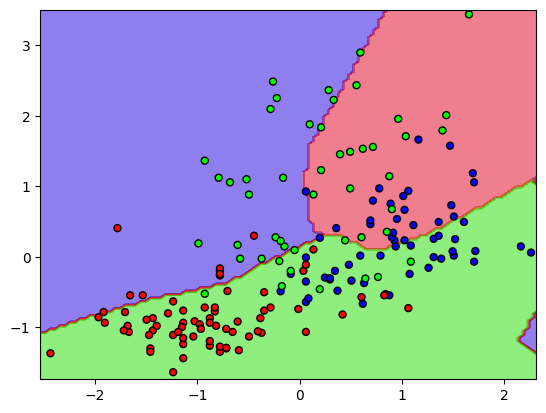

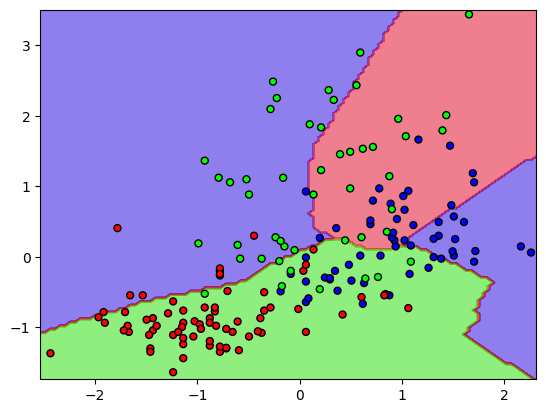

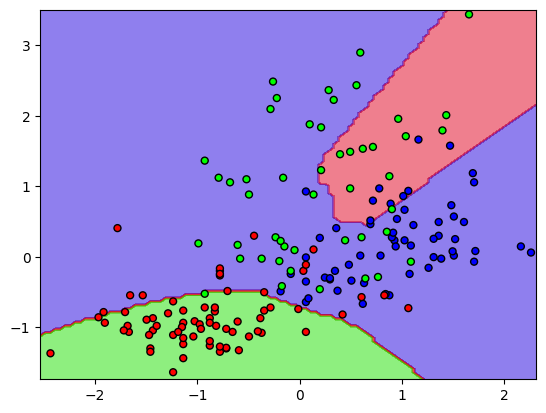

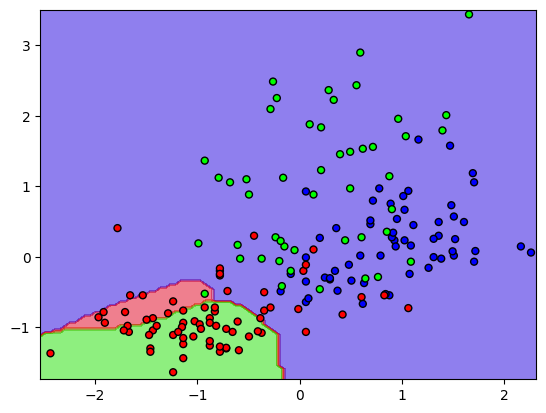

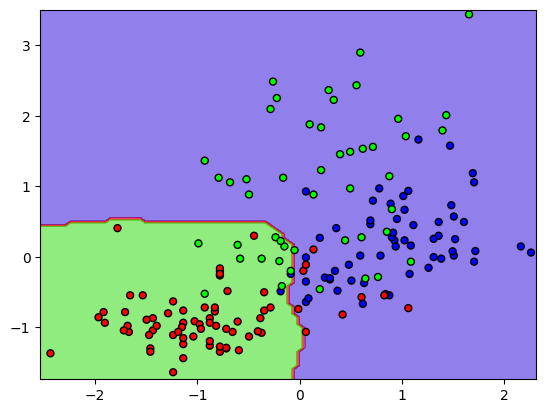

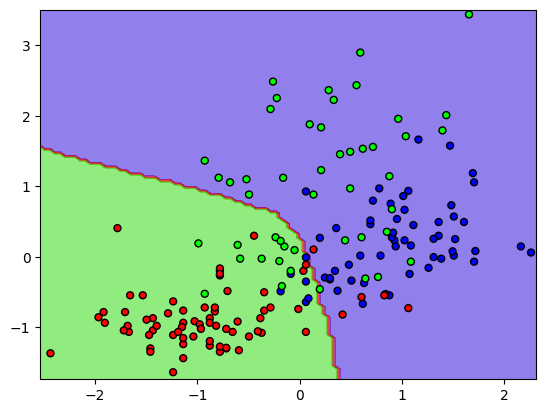

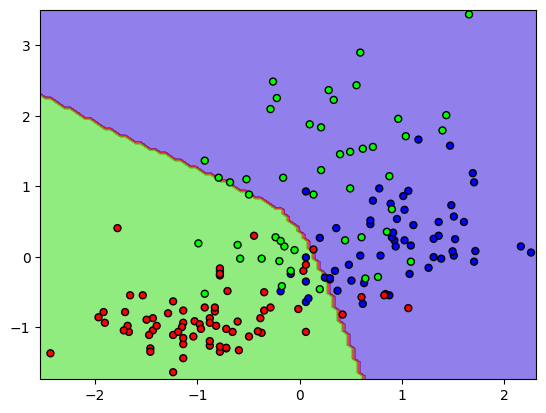

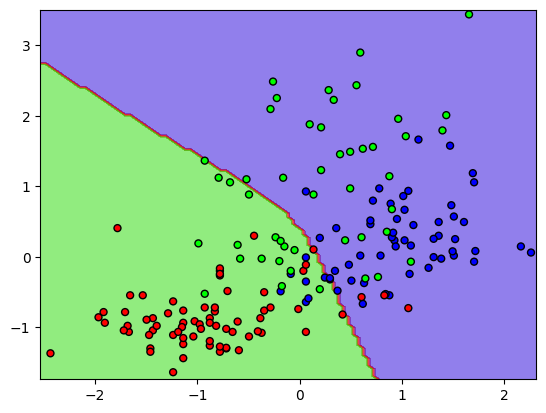

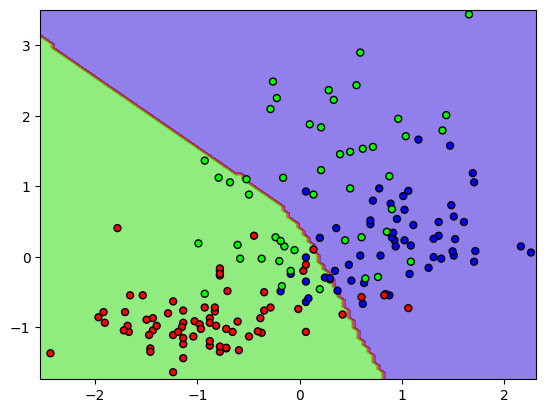

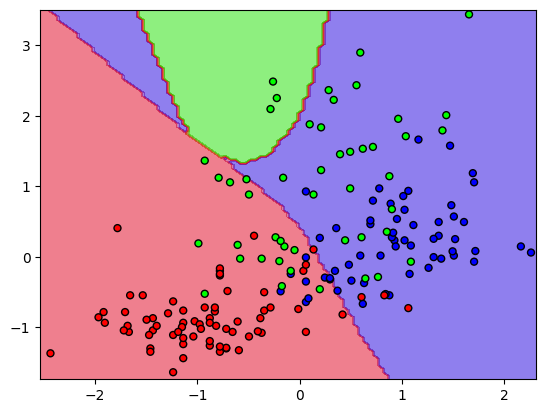

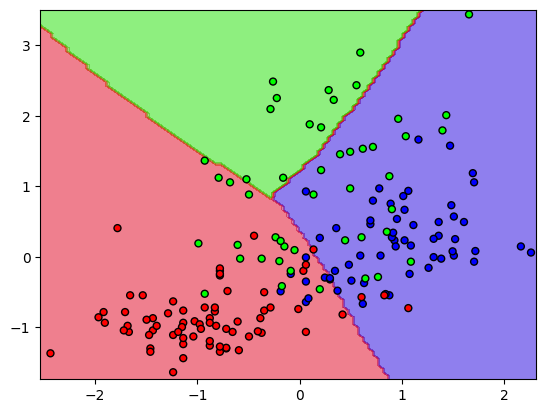

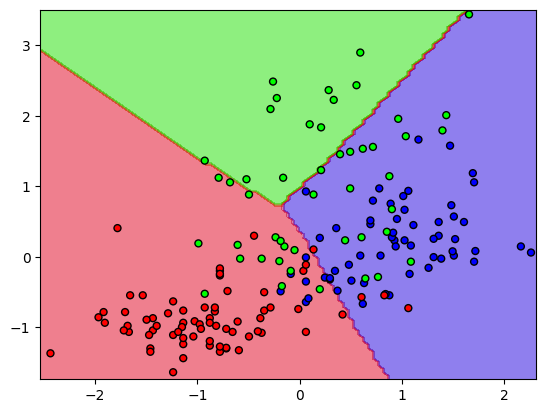

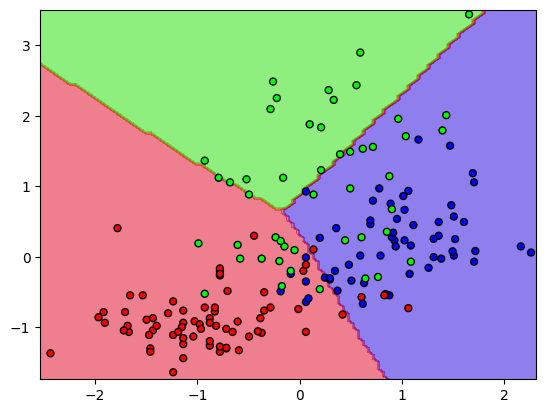

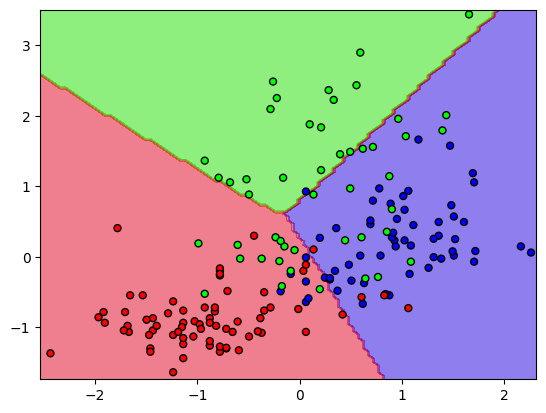

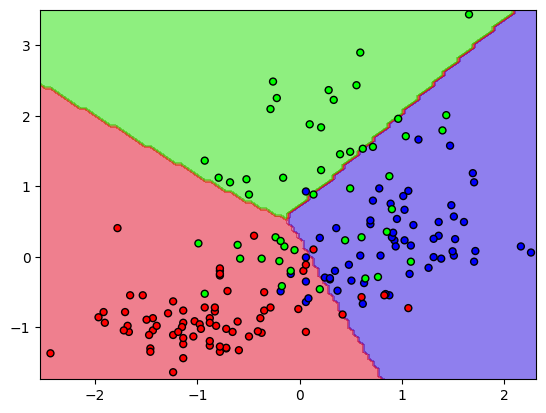

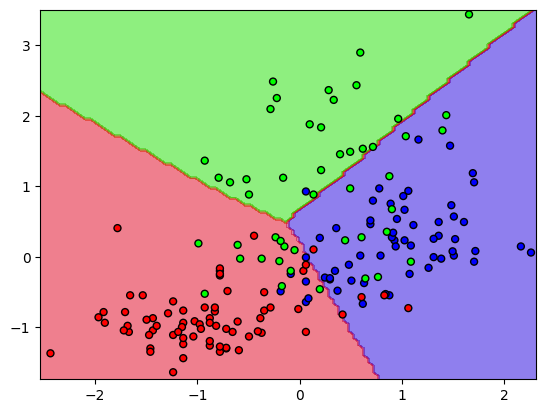

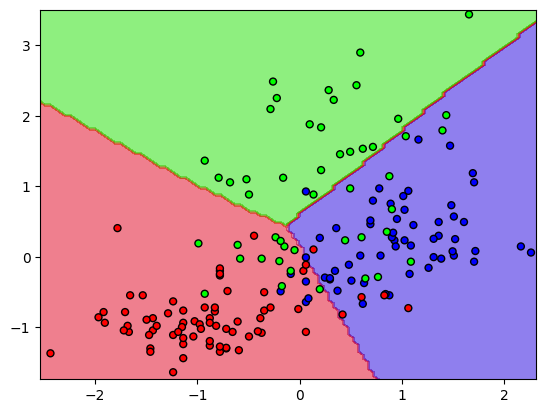

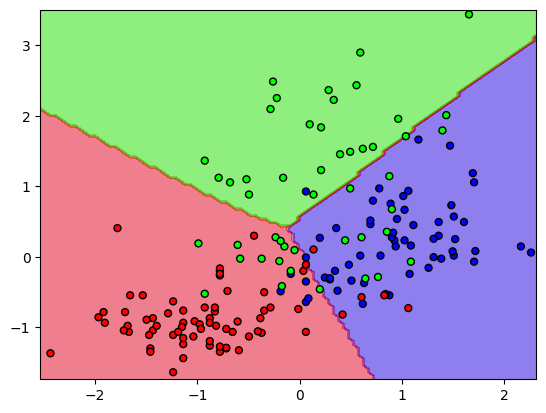

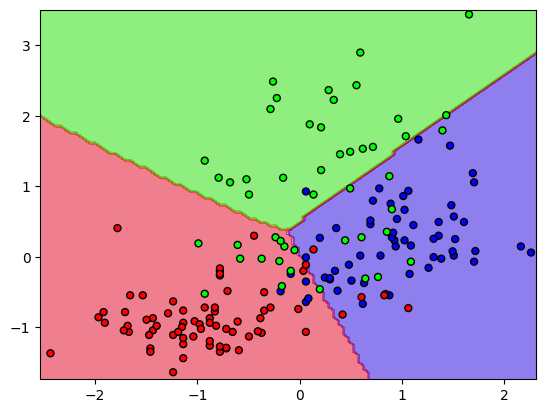

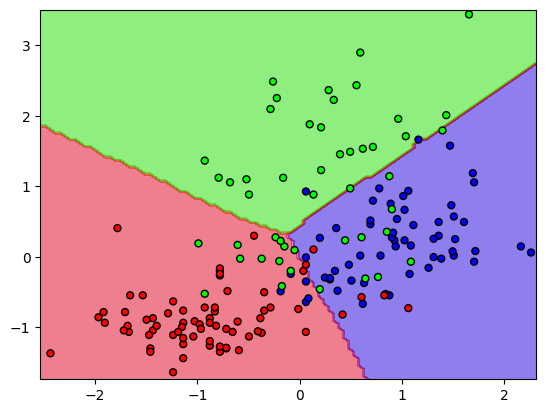

In [115]:
for i in range(200):
  # Forward 
  pred = net(X)
  loss = criterion(pred, Y)

  # Backward
  loss.backward()
  optimizer.step()

  if i % 10 == 0:
    plt.figure()
    plot_boundary(data, targets, net)
     